<a href="https://colab.research.google.com/github/MehemmedTagizade/Thesis_Automated-Investigation-of-Cyber-Attacks-Through-Network-Traffic-Analysis-PCAPs-/blob/TEST-CODES/FWA_DDos_SVM_10__new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np

In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load the dataset
file_path = '/content/drive/MyDrive/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv'
data = pd.read_csv(file_path)


In [ ]:
print(data.columns)  # See the actual column names


Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

In [ ]:
data.rename(columns=lambda x: x.strip(), inplace=True)


In [ ]:
print(data.columns)


Index(['Destination Port', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN Flag Co

In [ ]:
import pandas as pd

# Load your dataset (replace 'your_dataset.csv' with the actual filename)


# Check if "Label" column exists
if "Label" in data.columns:
    unique_labels = data["Label"].unique()
    print(f"Unique values in 'Label' column: {unique_labels}")
    print(f"Number of unique values: {len(unique_labels)}")
else:
    print("No 'Label' column found in this dataset.")
# Count occurrences of each label
label_counts = data["Label"].value_counts()

# Convert to percentages
label_percentages = (label_counts / label_counts.sum()) * 100

# Display the results
print(label_percentages)



Unique values in 'Label' column: ['BENIGN' 'DDoS']
Number of unique values: 2
Label
DDoS      56.713105
BENIGN    43.286895
Name: count, dtype: float64


In [ ]:

# Clean column names by removing extra spaces
data.columns = data.columns.str.replace(' ', '')
print(data.columns)

Index(['DestinationPort', 'FlowDuration', 'TotalFwdPackets',
       'TotalBackwardPackets', 'TotalLengthofFwdPackets',
       'TotalLengthofBwdPackets', 'FwdPacketLengthMax', 'FwdPacketLengthMin',
       'FwdPacketLengthMean', 'FwdPacketLengthStd', 'BwdPacketLengthMax',
       'BwdPacketLengthMin', 'BwdPacketLengthMean', 'BwdPacketLengthStd',
       'FlowBytes/s', 'FlowPackets/s', 'FlowIATMean', 'FlowIATStd',
       'FlowIATMax', 'FlowIATMin', 'FwdIATTotal', 'FwdIATMean', 'FwdIATStd',
       'FwdIATMax', 'FwdIATMin', 'BwdIATTotal', 'BwdIATMean', 'BwdIATStd',
       'BwdIATMax', 'BwdIATMin', 'FwdPSHFlags', 'BwdPSHFlags', 'FwdURGFlags',
       'BwdURGFlags', 'FwdHeaderLength', 'BwdHeaderLength', 'FwdPackets/s',
       'BwdPackets/s', 'MinPacketLength', 'MaxPacketLength',
       'PacketLengthMean', 'PacketLengthStd', 'PacketLengthVariance',
       'FINFlagCount', 'SYNFlagCount', 'RSTFlagCount', 'PSHFlagCount',
       'ACKFlagCount', 'URGFlagCount', 'CWEFlagCount', 'ECEFlagCount',
       '

In [ ]:
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.dropna(inplace=True)

# Display the first 10 rows of the dataset
print("First 10 rows of the dataset:")
print(data.head(10))



First 10 rows of the dataset:
   DestinationPort  FlowDuration  TotalFwdPackets  TotalBackwardPackets  \
0            54865             3                2                     0   
1            55054           109                1                     1   
2            55055            52                1                     1   
3            46236            34                1                     1   
4            54863             3                2                     0   
5            54871          1022                2                     0   
6            54925             4                2                     0   
7            54925            42                1                     1   
8             9282             4                2                     0   
9            55153             4                2                     0   

   TotalLengthofFwdPackets  TotalLengthofBwdPackets  FwdPacketLengthMax  \
0                       12                        0                  

In [ ]:
print(data.isnull().sum())


DestinationPort            0
FlowDuration               0
TotalFwdPackets            0
TotalBackwardPackets       0
TotalLengthofFwdPackets    0
                          ..
IdleMean                   0
IdleStd                    0
IdleMax                    0
IdleMin                    0
Label                      0
Length: 79, dtype: int64


In [ ]:
print(data['Label'].value_counts())


Label
DDoS      128025
BENIGN     97686
Name: count, dtype: int64


In [ ]:
irrelevant_columns = [
    'FwdPSHFlags', 'BwdPSHFlags', 'FwdURGFlags', 'BwdURGFlags',
    'CWEFlagCount', 'ECEFlagCount', 'FwdHeaderLength.1',
    'FwdAvgBytes/Bulk', 'FwdAvgPackets/Bulk', 'FwdAvgBulkRate',
    'BwdAvgBytes/Bulk', 'BwdAvgPackets/Bulk', 'BwdAvgBulkRate',
    'Init_Win_bytes_forward', 'Init_Win_bytes_backward',
    'SubflowFwdPackets', 'SubflowFwdBytes', 'SubflowBwdPackets', 'SubflowBwdBytes',
    'ActiveMean', 'ActiveStd', 'ActiveMax', 'ActiveMin',
    'IdleMean', 'IdleStd', 'IdleMax', 'IdleMin'
]

data = data.drop(columns=irrelevant_columns, errors='ignore')
print(data.columns)
print(len(data.columns))

Index(['DestinationPort', 'FlowDuration', 'TotalFwdPackets',
       'TotalBackwardPackets', 'TotalLengthofFwdPackets',
       'TotalLengthofBwdPackets', 'FwdPacketLengthMax', 'FwdPacketLengthMin',
       'FwdPacketLengthMean', 'FwdPacketLengthStd', 'BwdPacketLengthMax',
       'BwdPacketLengthMin', 'BwdPacketLengthMean', 'BwdPacketLengthStd',
       'FlowBytes/s', 'FlowPackets/s', 'FlowIATMean', 'FlowIATStd',
       'FlowIATMax', 'FlowIATMin', 'FwdIATTotal', 'FwdIATMean', 'FwdIATStd',
       'FwdIATMax', 'FwdIATMin', 'BwdIATTotal', 'BwdIATMean', 'BwdIATStd',
       'BwdIATMax', 'BwdIATMin', 'FwdHeaderLength', 'BwdHeaderLength',
       'FwdPackets/s', 'BwdPackets/s', 'MinPacketLength', 'MaxPacketLength',
       'PacketLengthMean', 'PacketLengthStd', 'PacketLengthVariance',
       'FINFlagCount', 'SYNFlagCount', 'RSTFlagCount', 'PSHFlagCount',
       'ACKFlagCount', 'URGFlagCount', 'Down/UpRatio', 'AveragePacketSize',
       'AvgFwdSegmentSize', 'AvgBwdSegmentSize', 'act_data_pkt_fwd',
 

In [ ]:
begnin_count = data[data['Label'] == 'BENIGN'].shape[0]
print(f"Number of BENIGN samples: {begnin_count}")

ddos_count = data[data['Label'] == 'DDoS'].shape[0]
print(f"Number of DDoS samples: {ddos_count}")

Number of BENIGN samples: 97686
Number of DDoS samples: 128025


In [ ]:
from math import floor
benign_samples = data[data['Label'] == 'BENIGN']
percentage = 0.1
malicious_samples = data[data['Label'] == 'DDoS'].sample(n=floor((begnin_count*percentage)/(1-percentage)), random_state=42)

# Combine the sampled data
data = pd.concat([benign_samples, malicious_samples])

# Shuffle the data
data = data.sample(frac=1, random_state=42).reset_index(drop=True)

In [ ]:
print(data['Label'].value_counts())


Label
BENIGN    97686
DDoS      10854
Name: count, dtype: int64


In [ ]:
# Calculate the correlation matrix, ignoring non-numerical columns
correlation_matrix = data.select_dtypes(include=[np.number]).corr()

# Find highly correlated features (e.g., with correlation > 0.9)
high_corr = correlation_matrix[correlation_matrix > 0.9]
print(high_corr)


                         DestinationPort  FlowDuration  TotalFwdPackets  \
DestinationPort                      1.0           NaN              NaN   
FlowDuration                         NaN       1.00000              NaN   
TotalFwdPackets                      NaN           NaN         1.000000   
TotalBackwardPackets                 NaN           NaN         0.964653   
TotalLengthofFwdPackets              NaN           NaN              NaN   
TotalLengthofBwdPackets              NaN           NaN         0.949403   
FwdPacketLengthMax                   NaN           NaN              NaN   
FwdPacketLengthMin                   NaN           NaN              NaN   
FwdPacketLengthMean                  NaN           NaN              NaN   
FwdPacketLengthStd                   NaN           NaN              NaN   
BwdPacketLengthMax                   NaN           NaN              NaN   
BwdPacketLengthMin                   NaN           NaN              NaN   
BwdPacketLengthMean      

In [ ]:
from sklearn.model_selection import train_test_split
X = data.drop('Label', axis=1)
y = data['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set size: {len(X_train)}, Test set size: {len(X_test)}")



Training set size: 86832, Test set size: 21708


In [ ]:
# Separate features and labels
features = data.drop('Label', axis=1)
labels = data['Label']
features.replace([np.inf, -np.inf], np.nan, inplace=True)
features.dropna(inplace=True)
features = features.select_dtypes(include=[float, int])
len(features)

108540

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(labels)

In [ ]:
round(data.shape[0]*80/100)

86832

In [ ]:
missing_labels = np.isnan(y_encoded).sum()
print(f"Number of missing values in y_encoded: {missing_labels}")

Number of missing values in y_encoded: 0


In [ ]:
train_size = round(len(y_encoded) * 0.9)

X_train = features_scaled[:train_size]
X_test = features_scaled[train_size:]
y_train = y_encoded[:train_size]
y_test = y_encoded[train_size:]

print(f"Length of X_train: {len(X_train)}")
print(f"Length of y_train: {len(y_train)}")
print(f"Length of X_test: {len(X_test)}")
print(f"Length of y_test: {len(y_test)}")

min_len = min(len(X_test), len(y_test))
X_test = X_test[:min_len]
y_test = y_test[:min_len]

print(f"Final Length of X_test: {len(X_test)}")
print(f"Final Length of y_test: {len(y_test)}")

Length of X_train: 97686
Length of y_train: 97686
Length of X_test: 10854
Length of y_test: 10854
Final Length of X_test: 10854
Final Length of y_test: 10854


Accuracy: 0.9964068546158098
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      9809
           1       0.99      0.97      0.98      1045

    accuracy                           1.00     10854
   macro avg       0.99      0.99      0.99     10854
weighted avg       1.00      1.00      1.00     10854



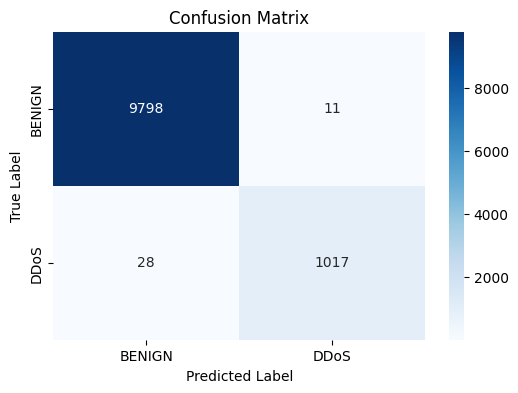

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize SVM Classifier (using RBF kernel for non-linearity)
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)

# Train the model
svm_model.fit(X_train, y_train)

# Make predictions
y_pred = svm_model.predict(X_test)

# Evaluate model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=["BENIGN", "DDoS"], yticklabels=["BENIGN", "DDoS"])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
